In [301]:
import sys, os
sys.path.append( os.path.join( '..', 'src' ) ) # set path to project src/

In [302]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [303]:
from utils import kaggle_io, kaggle_reader
from analysis import moving_window

In [304]:
import sklearn.externals.joblib
import scipy.misc
import importlib

In [305]:
# first define home path as kaggle_nuclei/, i.e., one level up from kaggle_nuclei/notebooks
homepath = os.path.join('..')
# define path for the kaggle csv file
f = os.path.join(homepath,'data','raw','stage1_train_labels.csv')
# define path for the unzipped training image folder
impath = os.path.join(homepath, 'data', 'raw', 'stage1_train')

In [306]:
# load csv file and decode the nuclei pixel locations for use later
decodedlabels = kaggle_reader.read_kaggle_csv(f)
# load all the images into gray scale
imgDF = kaggle_reader.load_all_raw_images(impath, mode='RGB')

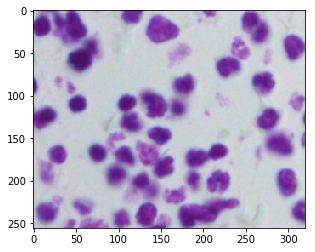

In [308]:
test_image = scipy.misc.imread('../data/small_split/test_image2.png', mode='RGB')
plt.imshow(test_image)

In [309]:
classifier = sklearn.externals.joblib.load('../models/neural_network_adam_200_100_nobuffer_gray_trimmed.pkl')

Preprocess image
Extracting sub images 0.009025096893310547
Extracting features 0.3668673038482666
Running prediction 0.1663532257080078
eliminating overlap 0.31051135063171387


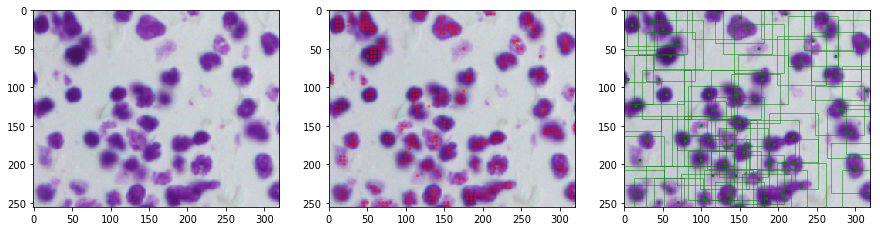

In [312]:
nn_gr_posbox, nn_centers = moving_window.run_moving_window(classifier, test_image, 'pixelval', 
                                {}, {'rgb2gray': None, 'trim': [1,99]}, [64, 64], [5, 5], 0.5, plot=True)

Preprocess image
Extracting sub images 0.11403059959411621
Extracting features 6.855799674987793
Running prediction 4.726329326629639
eliminating overlap 4.650943279266357


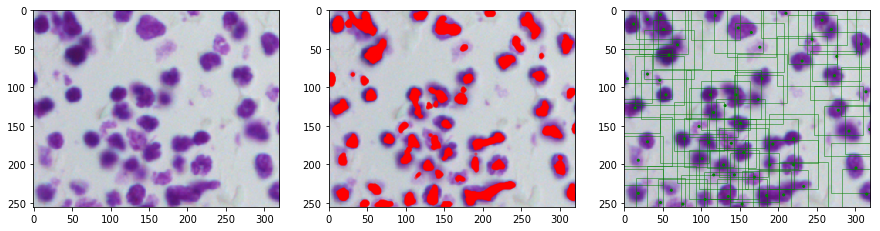

In [313]:
nn_gr_posbox, nn_centers = moving_window.run_moving_window(classifier, test_image, 'pixelval', 
                                {}, {'rgb2gray': None, 'trim': [1,99]}, 
                                                           [64, 64], [1, 1], 0.5, plot=True)

Preprocess image
Extracting sub images 0.01304006576538086
Extracting features 

C:\Users\YOUY\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


0.655482292175293
Running prediction 0.48944735527038574
eliminating overlap 2.1806821823120117


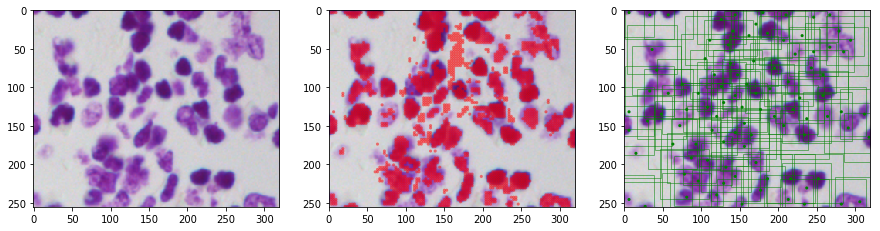

In [13]:
nnclass2 = sklearn.externals.joblib.load('../models/neural_network_adam_200_100_center_3px_roi.pkl')
nnpos_box = moving_window.run_moving_window(nnclass2, test_image, 'pixelval', 
                                          {},
                                          {'rgb2gray': None, 'trim': [1,99], 'norm': 'clahe'}, [64,64],[3,3],0.5)

In [298]:
# no image processing, roi based data set, 1=center 3x3 block is in nuclei
gkclass = sklearn.externals.joblib.load('../models/gkhp_svm_auto_tuned_center3px_p10data.pkl')

Preprocess image
Extracting sub images 0.07986259460449219
Extracting features 75.17489576339722
Running prediction 9.73598861694336
eliminating overlap 1.8936057090759277


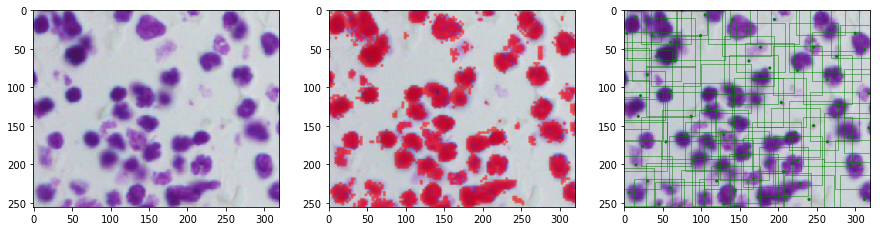

In [314]:
pos_box, centers = moving_window.run_moving_window(gkclass, test_image, 'gkhp', 
                                {'sigmas': [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 200 ] },
                               {}, [64,64],[3,3],0.4, plot=True)

Preprocess image
Extracting sub images 0.023070573806762695
Extracting features 

C:\Users\YOUY\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


1.2321443557739258
Running prediction 1.050766944885254
eliminating overlap 0.8631758689880371


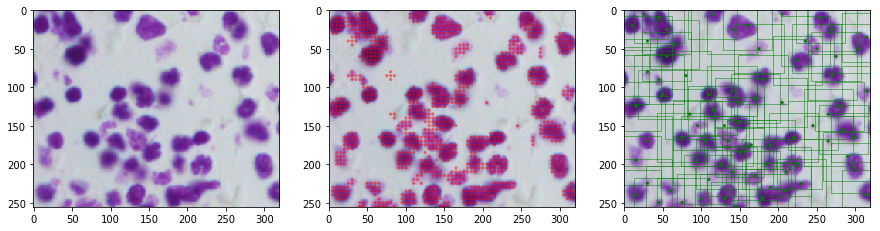

In [315]:
# CLAHE processing on image, roi based data set, 1=center 3x3 block is in nuclei
gkclass2 = sklearn.externals.joblib.load('../models/gkhp_svm_auto_tuned_center3px_clahe_halfdata.pkl')
pos_box2, gkcenters2 = moving_window.run_moving_window(gkclass2, test_image, 'gkhp', 
                                          {'sigmas': [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 200 ] },
                                          {'rgb2gray': None, 'trim': [1,99], 'norm': 'clahe'}, 
                                                       [64,64],[5,5],0.5, plot=True)

Preprocess image
Extracting sub images 

C:\Users\YOUY\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


0.9362657070159912
Extracting features 22.97536563873291
Running prediction 22.230348587036133
eliminating overlap 16.423834562301636


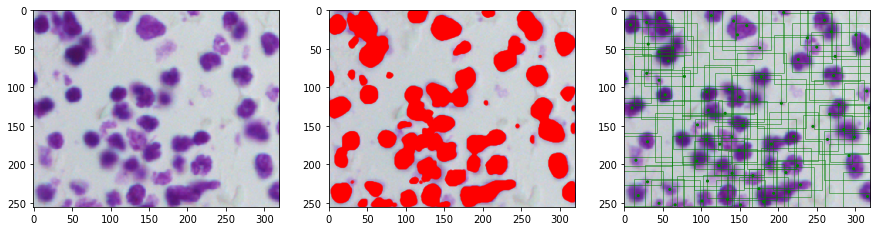

In [316]:
# CLAHE processing on image, 10x10 window extraction data set, 1=center 3x3 block is in nuclei
gkclass3 = sklearn.externals.joblib.load('../models/gkhp_svm_auto_tuned_center3px_window10_clahe.pkl')
pos_box3, gkcenters3 = moving_window.run_moving_window(gkclass3, test_image, 'gkhp', 
                                          {'sigmas': [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 200 ] },
                                          {'rgb2gray': None, 'trim': [1,99], 'norm': 'clahe'}, 
                                                       [64,64],[1,1],0.5, plot=True)

Preprocess image
Extracting sub images 0.022590160369873047
Extracting features 3.949908494949341
Running prediction 1.2247512340545654
eliminating overlap 0.9324564933776855


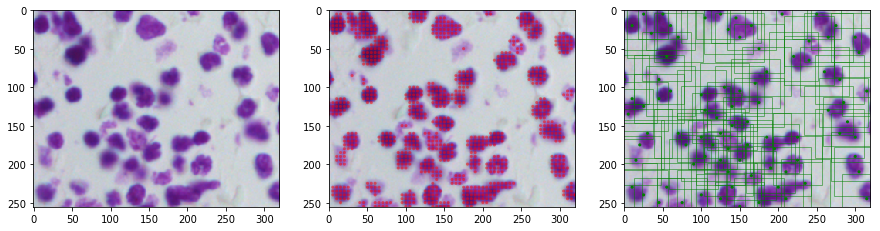

In [317]:
# no processing on image, 10x10 window extraction data set, 1=center 3x3 block is in nuclei
gkclass4 = sklearn.externals.joblib.load('../models/gkhp_svm_auto_tuned_center3px_window10_p10data.pkl')
pos_box4, gkcenters4 = moving_window.run_moving_window(gkclass4, test_image, 'gkhp', 
                                          {'sigmas': [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 200 ] },
                                          {}, [64,64],[5,5],0.5, plot=True)

In [14]:
from preprocess import image_processing

In [25]:
def mask_from_positive_box(positive_boxes, image_sizes):
    half_subimage_size = [31, 31]
    mask = np.zeros(image_sizes)
    for anchor in positive_boxes.SubImageAnchor:
        mask[anchor[0]+half_subimage_size[0], anchor[1]+half_subimage_size[1]] = 1
    return mask

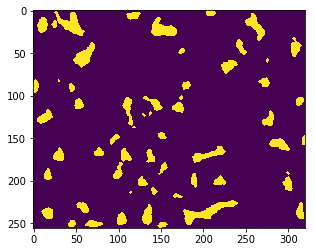

In [228]:
center_mask = mask_from_positive_box(nn_gr_posbox, test_image.shape[:2])
center_mask = skimage.morphology.opening(center_mask)
plt.imshow(center_mask)

In [173]:
import skimage.morphology

In [57]:
import scipy.ndimage

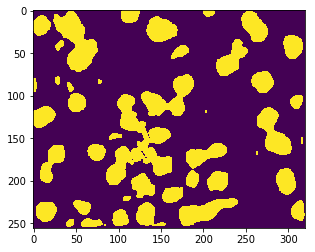

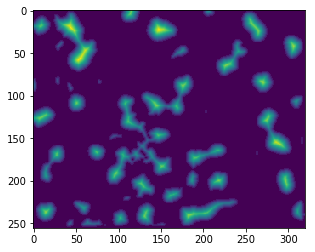

In [219]:
mask = mask_from_positive_box(pos_box3, test_image.shape[:2])
mask = skimage.morphology.binary_opening(mask, skimage.morphology.square(3))
plt.imshow(mask)
plt.show()
distance = scipy.ndimage.distance_transform_edt(mask)
plt.imshow(distance)

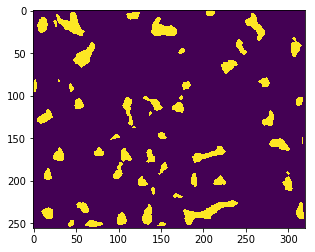

In [229]:
center_mask = center_mask*mask
plt.imshow(center_mask)

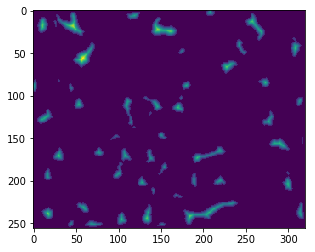

In [230]:
center_distance = scipy.ndimage.distance_transform_edt(center_mask)
plt.imshow(center_distance)

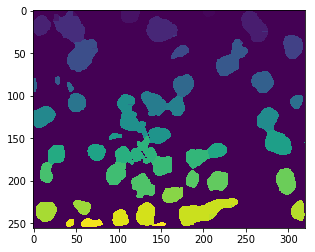

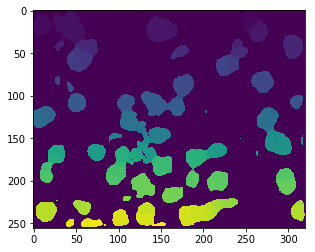

In [231]:
from analysis import image_segmentation
nn_center_points = image_segmentation.boxes_to_centers(nn_centers, test_image.shape)
lbl = skimage.measure.label(nn_center_points)
ids = skimage.morphology.watershed(-distance, lbl, mask=mask)
plt.imshow(ids)
plt.show()
maxima = skimage.feature.peak_local_max(grad_distance, min_distance=1, indices=False)
lbl = skimage.measure.label(maxima)
ids2 = skimage.morphology.watershed(-grad_distance, lbl, mask=mask)
plt.imshow(ids2)

In [74]:
    image_root = os.path.join('..', 'data', 'split', 'train')
    imdirs = [d for d in os.listdir(image_root)
              if os.path.isdir(os.path.join(image_root, d))]
    test_image_root = np.random.choice(imdirs)
    # image_array = scipy.misc.imread('../data/raw/stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png')
    image_array = scipy.misc.imread(os.path.join(image_root, test_image_root, 'images', test_image_root+'.png'))
    expected_masks_directory = os.path.join(image_root, test_image_root, 'masks')

In [75]:
expected_masks_directory

'..\\data\\split\\train\\f9ea1a1159c33f39bbe5f18bb278d961188b40508277eab7c0b4b91219b37b5d\\masks'

In [178]:
def extract_total_mask(imgid, decodedlabels, image_shape):
    """
    collects the pixel values (in gray scale) of nucleis and background (non-nuclei regions) in a single gray scale
    image
    :param imgid: the ImageId to work on
    :param decodedlabels: decoded pixel labels read from Kaggle csv and decoded (see utils/kaggle_reader.py)
    :param imgDF: dataframe of all the images, loaded by load_all_images in utils/kaggle_reader.py
    :return: two 1D arrays: first an array of pixel values for the nucleis, second an array of pixel values for the
            background
    """

    # find all the nucleis associated with the given image
    nucleis = decodedlabels[decodedlabels.ImageId == imgid].DecodedPixels.values
    # initialize the list for pixel indices that are part of a nuclei
    all_nuclei_index = []
    for nuclei in nucleis:
        # add pixel indices from each nuclei to the common list
        all_nuclei_index.extend(nuclei)
    # generate a mask the same size of the raveled image vector where True = background and False = nuclei
    mask = np.zeros(np.prod(image_shape),)
    mask[all_nuclei_index] = 1
    return mask.reshape(image_shape, order='F')

In [179]:
from utils import kaggle_io

In [180]:
# first define home path as kaggle_nuclei/, i.e., one level up from kaggle_nuclei/notebooks
homepath = os.path.join('..')
# define path for the kaggle csv file
f = os.path.join(homepath,'data','raw','stage1_train_labels.csv')
# define path for the unzipped training image folder
impath = os.path.join(homepath, 'data', 'raw', 'stage1_train')

In [181]:
decodedlabels = kaggle_reader.read_kaggle_csv(f)

In [182]:
true_mask = extract_total_mask('0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3',
                              decodedlabels, test_image.shape[:2])

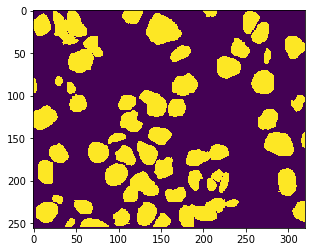

In [183]:
plt.imshow(true_mask)

In [213]:
np.sum( (true_mask == 1) & (center_mask==1))/np.sum( (true_mask == 1) | (center_mask==1))

0.74466610182546411

In [220]:
np.sum( (true_mask == 1) & (mask==1))/np.sum( (true_mask == 1) | (mask==1))

0.74624613003095974

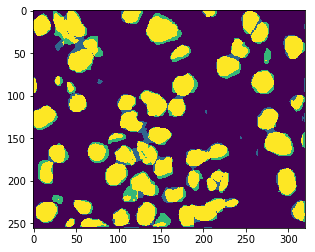

In [221]:
plt.imshow(true_mask*2+center_mask)

In [153]:
from analysis import hog_classifier
from preprocess import image_processing

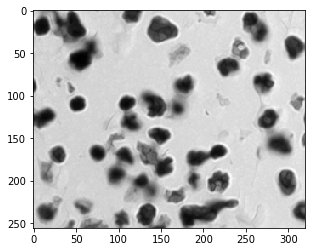

In [154]:
enhanced_image = image_processing.process_image(test_image, {'rgb2gray': None})
gradx, grady = hog_classifier.derivative_mask_1d_centered(enhanced_image)
orientation, strength = hog_classifier.find_grad_orientation_strength(gradx, grady)
enchaned_edge_image = enhanced_image*0.5 + strength*0.5
plt.imshow(enchaned_edge_image, cmap='gray')

In [155]:
import skimage.filters

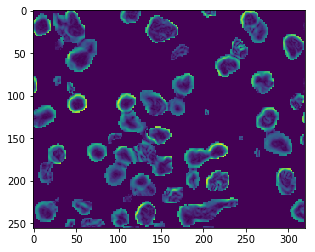

In [165]:
plt.imshow(strength*mask)

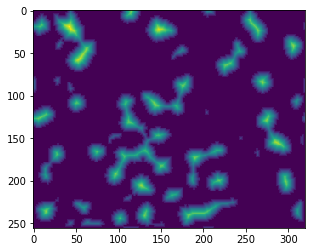

In [164]:
grad_distance = scipy.ndimage.distance_transform_edt(strength*mask)
plt.imshow(grad_distance)

In [234]:
import cv2

In [238]:
gray = (mask*255).astype(np.uint8)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

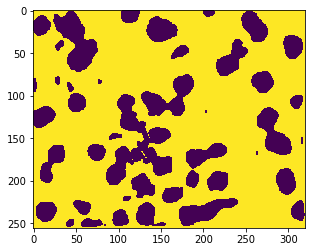

In [240]:
plt.imshow(thresh)

In [258]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

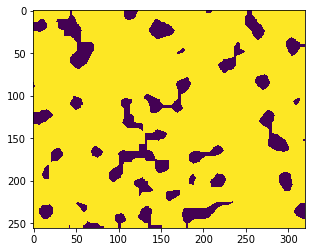

In [259]:
plt.imshow(sure_bg)

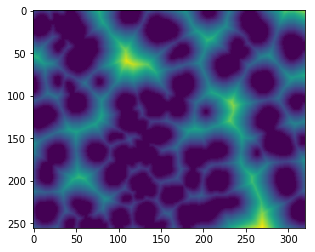

In [260]:
plt.imshow(dist_transform)

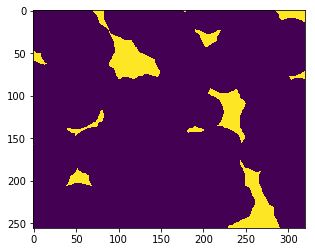

In [261]:
plt.imshow(sure_fg)

In [266]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

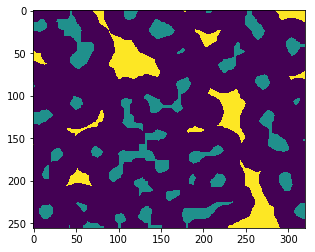

In [267]:
plt.imshow(markers)

In [272]:
markers = cv2.watershed(test_image,markers)
test_image[markers == -1] = [255,0,0]

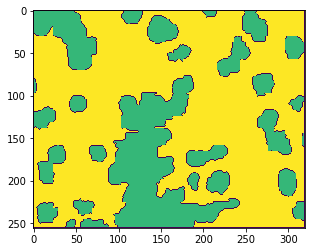

In [273]:
plt.imshow(markers)

In [295]:
true_masks = []
for i in range(10):
    mask = np.zeros((200,200))
    mask[i*10:i*10+5, i*10:i*10+5]=1
    true_masks.append(mask)
    
predict_masks = []
for i in range(10):
    mask = np.zeros((200,200))
    if i > 5:
        mask[i*10+1:i*10+5, i*10:i*10+5]=1
    else:
        mask[i*10:i*10+5, i*10:i*10+5]=1
    predict_masks.append(mask)

In [281]:
from analysis import kaggle_evaluation

In [283]:
evaluation = kaggle_evaluation.KaggleEvaluation()

In [284]:
evaluation.set_expected_masks(true_masks)

In [296]:
evaluation.set_predicted_masks(predict_masks)

In [297]:
evaluation.calculate_iou()
evaluation.calculate_score_with_thresholds()
evaluation.print_table()


Threshold	Precision
0.500	10	0	0	1.000
0.550	10	0	0	1.000
0.600	10	0	0	1.000
0.650	10	0	0	1.000
0.700	10	0	0	1.000
0.750	10	0	0	1.000
0.800	6	4	4	0.429
0.850	6	4	4	0.429
0.900	6	4	4	0.429
0.950	6	4	4	0.429
Score	-	-	-	0.771



In [291]:
16/25

0.64